In [1]:
# Libaries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
# ignore displaying the warnings
warnings.filterwarnings('ignore')                           

In [2]:
# check the files uploaded to the z/OS instance
import glob
print(glob.glob("pend-gdis-1960-2018-disasterlocations.csv"))

['pend-gdis-1960-2018-disasterlocations.csv']


In [4]:
# load dataset 
df = pd.read_csv('pend-gdis-1960-2018-disasterlocations.csv')

In [5]:
# view first 5 rows of dataset
print('Rows,', 'Columns')
print(df.shape) 
df.head()

Rows, Columns
(39953, 18)


id  country iso3   gwno  year  geo_id  geolocation  level     adm1  \
0  109  Albania  ALB  339.0  2009     346  Ana E Malit      3  Shkoder   
1  109  Albania  ALB  339.0  2009     351       Bushat      3  Shkoder   
2  175   Angola  AGO  540.0  2001     760       Onjiva      3   Cunene   
3  187   Angola  AGO  540.0  2009     710        Evale      3   Cunene   
4  187   Angola  AGO  540.0  2009     749         Mupa      3   Cunene   

       adm2         adm3     location  historical hist_country disastertype  \
0  Shkodres  Ana E Malit  Ana E Malit           0          NaN        flood   
1  Shkodres       Bushat       Bushat           0          NaN        flood   
2  Cuanhama       Onjiva       Onjiva           0          NaN        flood   
3  Cuanhama        Evale        Evale           0          NaN        flood   
4   Cuvelai         Mupa         Mupa           0          NaN        flood   

  disasterno   latitude  longitude  
0  2009-0631  42.020948  19.418317  
1  2009-0631  41.959294  19.514309  
2  2001-0146 -17.093484  15.665758  
3  2009-0092 -16.531533  15.773987  
4  2009-0092 -16.200065  15.844189

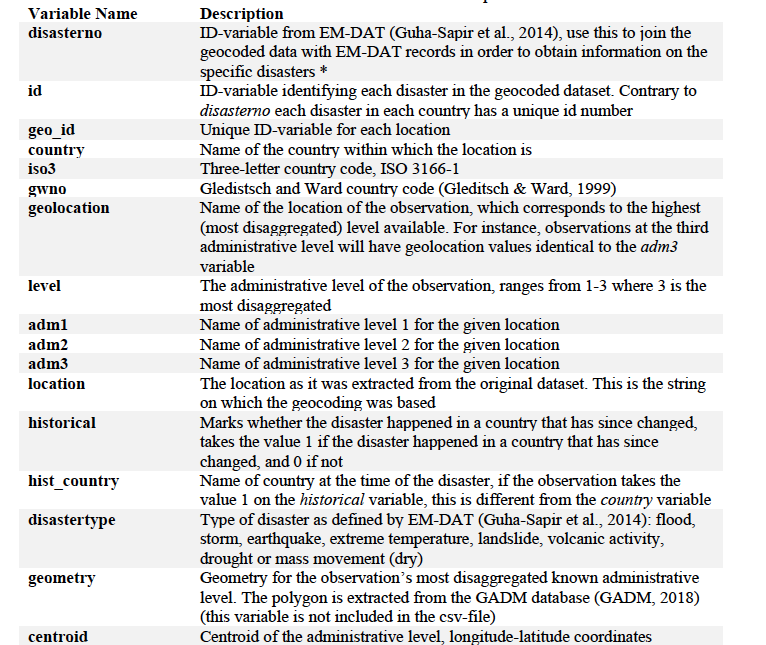

In [6]:
# display general information about the train data set
# good way to check if any features have null values and the levels of categorical variables
pd.DataFrame({'Dtype':df.dtypes,
              'Levels':[df[x].unique() for x in df.columns],
              'Null_Count':df.isnull().sum()
             })

Dtype                                             Levels  \
id             object  [109, 175, 187, 189, 527, 533, 539, 568, 593, ...   
country        object  [Albania, Angola, Bangladesh, Belgium, Bolivia...   
iso3           object  [ALB, AGO, BGD, BEL, BOL, BIH, BRA, CAN, CHL, ...   
gwno          float64  [339.0, 540.0, 771.0, 211.0, 145.0, 346.0, 140...   
year            int64  [2009, 2001, 2010, 1995, 1996, 1997, 2000, 200...   
geo_id          int64  [346, 351, 760, 710, 749, 761, 711, 750, 1875,...   
geolocation    object  [Ana E Malit, Bushat, Onjiva, Evale, Mupa, Hat...   
level           int64                                          [3, 2, 1]   
adm1           object  [Shkoder, Cunene, Chittagong, Dhaka, Sylhet, W...   
adm2           object  [Shkodres, Cuanhama, Cuvelai, Noakhali, Tangai...   
adm3           object  [Ana E Malit, Bushat, Onjiva, Evale, Mupa, Hat...   
location       object  [Ana E Malit, Bushat, Onjiva, Evale, Mupa, Hat...   
historical      int64                                             [0, 1]   
hist_country   object  [nan, Pakistan, Germany West, USSR, Indonesia,...   
disastertype   object  [flood, storm, earthquake, extreme temperature...   
disasterno     object  [2009-0631, 2001-0146, 2009-0092, 2010-0105, 1...   
latitude      float64  [42.02094846, 41.95929412, -17.09348436, -16.5...   
longitude     float64  [19.4183173, 19.51430874, 15.66575761, 15.7739...   

              Null_Count  
id                     0  
country                0  
iso3                 315  
gwno                 434  
year                   0  
geo_id                 0  
geolocation            0  
level                  0  
adm1                   0  
adm2               25883  
adm3               37543  
location               0  
historical             0  
hist_country       39717  
disastertype           0  
disasterno             0  
latitude               0  
longitude              0

There are many missing variables for adm2 & adm3 & hist_country. This information is redundant since we already have the name and and country so they will be dropped. Since adm2 & adm3 were drop due to missing data, we will also drop adm1 to keep consistency 

In [10]:
df = df.drop(['adm1'], axis=1)
df = df.drop(['adm2'], axis=1)
df = df.drop(['adm3'], axis=1)
df = df.drop(['hist_country'], axis=1)

In [11]:
# To show matplotlib plots inline
%matplotlib inline

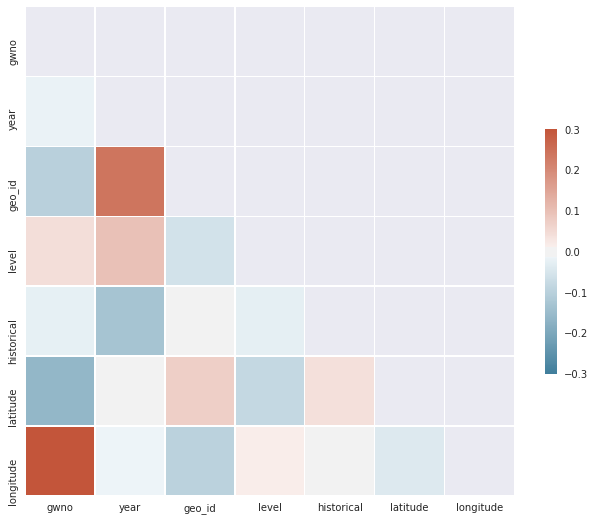

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

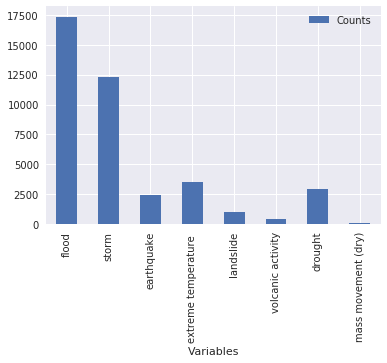

In [15]:
degrees = df["disastertype"]
counts = Counter(degrees)
x = [key for key in counts.keys()]
y = [value for value in counts.values()]
df_counts = pd.DataFrame({'Variables':x, 'Counts':y})
ax = df_counts.plot.bar(x='Variables',y='Counts')

Floods are the most common natural diaster by a very large margin. Followed by Storm and earthquake. 

Question 1:
Are there more disaster near the equator or farther away?


Question 2:Where is the best location to maybe have a relief center base on the natural disaster frequency and location?

Question 3:Are there more natural disaster recently?

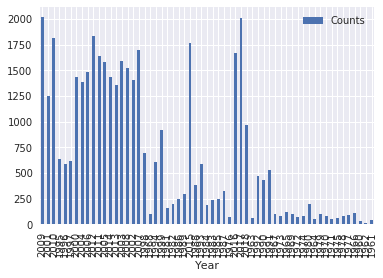

In [16]:
degrees = df["year"]
counts = Counter(degrees)
x = [key for key in counts.keys()]
y = [value for value in counts.values()]
df_counts = pd.DataFrame({'Year':x, 'Counts':y})
ax = df_counts.plot.bar(x='Year',y='Counts')

Astoundingly Yes, there are greater number of disaster in recent years. Particularly in the past 19 years.

Machine Learning Question:What is the probability of a certain natural disaster at a location?

In [17]:
# Data Pre-Processing for ML model.
nomissingdata=df.dropna()

In [18]:
nomissingdata.head()

id  country iso3   gwno  year  geo_id  geolocation  level     location  \
0  109  Albania  ALB  339.0  2009     346  Ana E Malit      3  Ana E Malit   
1  109  Albania  ALB  339.0  2009     351       Bushat      3       Bushat   
2  175   Angola  AGO  540.0  2001     760       Onjiva      3       Onjiva   
3  187   Angola  AGO  540.0  2009     710        Evale      3        Evale   
4  187   Angola  AGO  540.0  2009     749         Mupa      3         Mupa   

   historical disastertype disasterno   latitude  longitude  
0           0        flood  2009-0631  42.020948  19.418317  
1           0        flood  2009-0631  41.959294  19.514309  
2           0        flood  2001-0146 -17.093484  15.665758  
3           0        flood  2009-0092 -16.531533  15.773987  
4           0        flood  2009-0092 -16.200065  15.844189

In [19]:
df = nomissingdata
df = df.drop(['id'], axis=1)
df.shape

(39210, 13)

Next, transform the categorical variables into numerical variables

In [20]:
df["disastertype"] = df["disastertype"].astype('category')
df.dtypes
df["disastertype"] = df["disastertype"].cat.codes
df.head()

country iso3   gwno  year  geo_id  geolocation  level     location  \
0  Albania  ALB  339.0  2009     346  Ana E Malit      3  Ana E Malit   
1  Albania  ALB  339.0  2009     351       Bushat      3       Bushat   
2   Angola  AGO  540.0  2001     760       Onjiva      3       Onjiva   
3   Angola  AGO  540.0  2009     710        Evale      3        Evale   
4   Angola  AGO  540.0  2009     749         Mupa      3         Mupa   

   historical  disastertype disasterno   latitude  longitude  
0           0             3  2009-0631  42.020948  19.418317  
1           0             3  2009-0631  41.959294  19.514309  
2           0             3  2001-0146 -17.093484  15.665758  
3           0             3  2009-0092 -16.531533  15.773987  
4           0             3  2009-0092 -16.200065  15.844189

In [21]:
df["disastertype"]

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        6
9        6
10       6
11       6
12       6
13       6
14       6
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       6
23       6
24       6
25       6
26       6
27       6
28       3
29       3
        ..
39917    6
39918    6
39919    6
39920    3
39921    3
39922    3
39923    3
39924    6
39925    6
39926    6
39927    3
39928    3
39929    2
39930    2
39931    2
39932    2
39933    2
39934    2
39935    2
39936    2
39937    4
39938    7
39939    0
39940    0
39941    0
39942    0
39943    0
39944    0
39945    0
39946    0
Name: disastertype, dtype: int8

In [22]:
df = df.drop(['geo_id'], axis=1)
df = df.drop(['disasterno'], axis=1)

In [23]:
df["iso3"] = df["iso3"].astype('category')
df["iso3"] = df["iso3"].cat.codes

df["country"] = df["country"].astype('category')
df["country"] = df["country"].cat.codes

df["geolocation"] = df["geolocation"].astype('category')
df["geolocation"] = df["geolocation"].cat.codes

df["location"] = df["location"].astype('category')
df["location"] = df["location"].cat.codes

In [24]:
pd.DataFrame({'Dtype':df.dtypes,
              'Levels':[df[x].unique() for x in df.columns],
              'Null_Count':df.isnull().sum()
             })

Dtype                                             Levels  \
country         int16  [1, 3, 10, 12, 16, 17, 19, 25, 29, 43, 48, 51,...   
iso3            int16  [3, 2, 17, 13, 24, 20, 27, 34, 40, 62, 67, 72,...   
gwno          float64  [339.0, 540.0, 771.0, 211.0, 145.0, 346.0, 140...   
year            int64  [2009, 2001, 2010, 1995, 1996, 1997, 2000, 200...   
geolocation     int16  [318, 1407, 6450, 2667, 5869, 3310, 2928, 3017...   
level           int64                                          [3, 2, 1]   
location        int16  [7005, 8399, 14880, 9998, 14017, 10819, 10336,...   
historical      int64                                             [0, 1]   
disastertype     int8                           [3, 6, 1, 2, 4, 7, 0, 5]   
latitude      float64  [42.02094846, 41.95929412, -17.09348436, -16.5...   
longitude     float64  [19.4183173, 19.51430874, 15.66575761, 15.7739...   

              Null_Count  
country                0  
iso3                   0  
gwno                   0  
year                   0  
geolocation            0  
level                  0  
location               0  
historical             0  
disastertype           0  
latitude               0  
longitude              0

In [25]:
# split train and test data
from sklearn.model_selection import train_test_split
X = df.drop(['disastertype'],axis=1)
y = df['disastertype']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

### Random Forest Model 

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [32]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_val)
print("Score on Training: ", metrics.accuracy_score(y_true = y_train, y_pred = train_pred))
print("Score on Testing: ",metrics.accuracy_score(y_true = y_val, y_pred = test_pred))

Score on Training:  0.963857616497
Score on Testing:  0.737821984188


### Hyper-parameters Tuning 

In [33]:
from sklearn.model_selection import GridSearchCV
parameters ={'min_samples_split':[10,20,50,100,200],'max_depth':[3,5,10],'n_estimators':[50,100,200,300]}
grid_cv=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [10, 20, 50, 100, 200], 'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Random Forest Model - Tackle overfitting

In [35]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=11,min_samples_leaf=1)
rf2.fit(X_train, y_train)
train_pred = rf2.predict(X_train)
test_pred = rf2.predict(X_val)
print("Score on Training: ", metrics.accuracy_score(y_true = y_train, y_pred = train_pred))
print("Score on Testing: ",metrics.accuracy_score(y_true = y_val, y_pred = test_pred))

Score on Training:  0.786789084417
Score on Testing:  0.727195443339


In [36]:
rf3 = RandomForestClassifier(n_estimators=200, max_depth=14,min_samples_leaf=1, min_samples_split=10)
rf3.fit(X_train, y_train)
train_pred = rf3.predict(X_train)
test_pred = rf3.predict(X_val)
print("Score on Training: ", metrics.accuracy_score(y_true = y_train, y_pred = train_pred))
print("Score on Testing: ",metrics.accuracy_score(y_true = y_val, y_pred = test_pred))

Score on Training:  0.826174080956
Score on Testing:  0.750318796225
